In [1]:
# import libraries
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt

# inline plots
%matplotlib inline

# Data

In [2]:
# read traning data
df_train = pd.read_csv("exercise_2_training.csv")

# print the dataframe
print('dataset')
print(df_train)

# create the input and output attributes
inp_attr = df_train['x'].values.reshape(-1, 1) #creates feature vector
out_attr = df_train['y'].values

#extract feature vectors (1 feature per data point)
print('\noriginal features\n', inp_attr)

dataset
   id         x         y
0   0  0.000000  0.063545
1   1  0.111111  0.584181
2   2  0.222222  1.155635
3   3  0.333333  0.763420
4   4  0.444444  0.167508
5   5  0.555556 -0.306692
6   6  0.666667 -0.977889
7   7  0.777778 -1.082657
8   8  0.888889 -0.755205
9   9  1.000000 -0.158812

original features
 [[0.        ]
 [0.11111111]
 [0.22222222]
 [0.33333333]
 [0.44444444]
 [0.55555556]
 [0.66666667]
 [0.77777778]
 [0.88888889]
 [1.        ]]


In [5]:
#we want to create polynomial features based on the input features
# generate the nonlinear features
poly_order = 3 #number of columns

#bias creates another column where all cells = 1. It replaces our intercept. We don't want that since our linear model already takes care of the intercept
#create polynomial feature object
poly = PolynomialFeatures(poly_order,include_bias=False)

#pass the polynomial feature object to the fit_transform function
inp_feat = poly.fit_transform(inp_attr) #creates our input features
print('new features\n', inp_feat)

new features
 [[0.         0.         0.        ]
 [0.11111111 0.01234568 0.00137174]
 [0.22222222 0.04938272 0.01097394]
 [0.33333333 0.11111111 0.03703704]
 [0.44444444 0.19753086 0.08779149]
 [0.55555556 0.30864198 0.17146776]
 [0.66666667 0.44444444 0.2962963 ]
 [0.77777778 0.60493827 0.47050754]
 [0.88888889 0.79012346 0.70233196]
 [1.         1.         1.        ]]


# Model

In [6]:
# create a linear model with intercept
#a lineear regression object
ols = linear_model.LinearRegression(fit_intercept=True)

# traing the linear model using traning data with the new features from last cell
ols.fit(inp_feat, out_attr)

LinearRegression()

In [7]:
# inspect coefficients
print('w0 = ', ols.intercept_)
print('weights = ', ols.coef_)

w0 =  0.004258946678499277
weights =  [ 10.27420153 -31.24912569  20.87642314]


In [8]:
# predict back the training data & calculate MSE
train_pred = ols.predict(inp_feat)

print('Linear regression predictions')
print(train_pred)

print('Actual data')
print(out_attr)

Linear regression predictions
[ 0.00425895  0.78868229  0.97334469  0.73006857  0.23067634 -0.3530096
 -0.84916682 -1.08597291 -0.89160547 -0.09424207]
Actual data
[ 0.06354467  0.58418105  1.15563523  0.76342042  0.16750767 -0.30669167
 -0.97788916 -1.08265719 -0.75520471 -0.15881234]


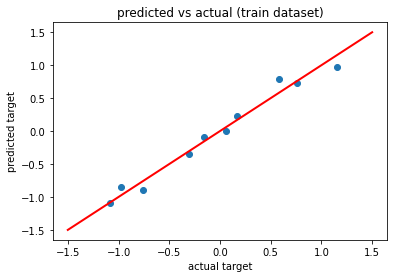

In [9]:
# predicted vs actual plot
plt.scatter(out_attr, train_pred)
plt.plot([-1.5,1.5],[-1.5,1.5],'r-', linewidth=2)
plt.xlabel('actual target')
plt.ylabel('predicted target')
plt.title('predicted vs actual (train dataset)')
plt.show()

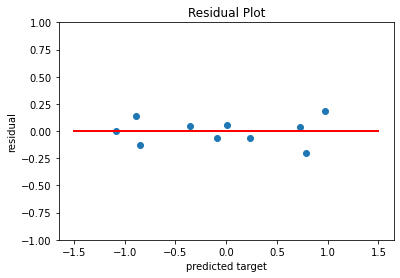

In [10]:
# residual fit
residual = out_attr - train_pred
plt.scatter(train_pred, residual)
plt.plot([-1.5,1.5],[0,0],'r-', linewidth=2)
plt.xlabel('predicted target')
plt.ylabel('residual')
plt.title('Residual Plot')
plt.ylim([-1,1])
plt.show()

#errors are evenly scattered above and below
#if there is a trend, the model is not sufficient
#has a constant variance

In [11]:
# read testing data
df_test = pd.read_csv("exercise_2_testing.csv")

# print the dataframe
print(df_test.head())

   id         x         y
0   0  0.000000  0.442580
1   1  0.010101  0.489103
2   2  0.020202  0.494935
3   3  0.030303  0.205728
4   4  0.040404  0.422941


In [13]:
# create the input and output attributes
test_inp_attr = df_test['x'].values.reshape(-1, 1) 

# generate the nonlinear features
test_inp_feat = poly.fit_transform(test_inp_attr)
test_out_attr = df_test['y'].values

# predict at the new input
test_pred = ols.predict(test_inp_feat)

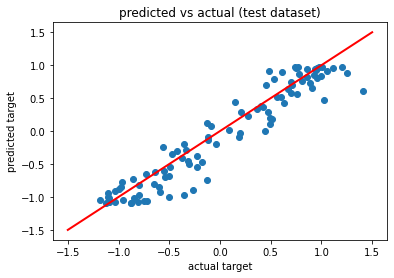

In [14]:
# predicted vs actual plot
plt.scatter(test_out_attr, test_pred)
plt.plot([-1.5,1.5],[-1.5,1.5],'r-', linewidth=2)
plt.xlabel('actual target')
plt.ylabel('predicted target')
plt.title('predicted vs actual (test dataset)')
plt.show()

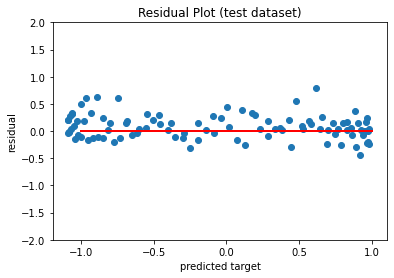

In [15]:
# residual fit
residual = test_out_attr - test_pred
plt.scatter(test_pred, residual)
plt.plot([-1,1],[0,0],'r-', linewidth=2)
plt.xlabel('predicted target')
plt.ylabel('residual')
plt.title('Residual Plot (test dataset)')
plt.ylim([-2,2])
plt.show()

## What if we have a different polynomial order?
Lets see this same code but with a polynomial order of 1.

In [16]:
poly_order = 1 #number of columns

#create polynomial feature object
poly = PolynomialFeatures(poly_order,include_bias=False)

#pass the polynomial feature object to the fit_transform function
inp_feat = poly.fit_transform(inp_attr) #creates our input features
print('new features\n', inp_feat)

new features
 [[0.        ]
 [0.11111111]
 [0.22222222]
 [0.33333333]
 [0.44444444]
 [0.55555556]
 [0.66666667]
 [0.77777778]
 [0.88888889]
 [1.        ]]


In [17]:
# create a linear model with intercept
ols = linear_model.LinearRegression(fit_intercept=True)
# traing the linear model using traning data with the features from last cell
ols.fit(inp_feat, out_attr)

# inspect coefficients
print('w0 = ', ols.intercept_)
print('weights = ', ols.coef_)

w0 =  0.7162080406540711
weights =  [-1.54180929]


In [18]:
# predict back the training data & calculate MSE
train_pred = ols.predict(inp_feat)

print('Linear regression predictions')
print(train_pred)

print('Actual data')
print(out_attr)

Linear regression predictions
[ 0.71620804  0.5448959   0.37358375  0.20227161  0.03095947 -0.14035268
 -0.31166482 -0.48297696 -0.6542891  -0.82560125]
Actual data
[ 0.06354467  0.58418105  1.15563523  0.76342042  0.16750767 -0.30669167
 -0.97788916 -1.08265719 -0.75520471 -0.15881234]


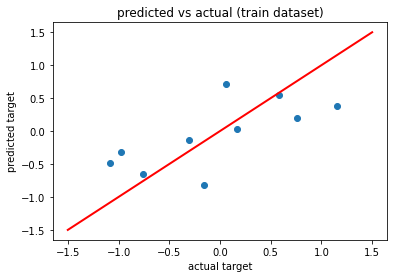

In [19]:
# predicted vs actual plot
plt.scatter(out_attr, train_pred)
plt.plot([-1.5,1.5],[-1.5,1.5],'r-', linewidth=2)
plt.xlabel('actual target')
plt.ylabel('predicted target')
plt.title('predicted vs actual (train dataset)')
plt.show()

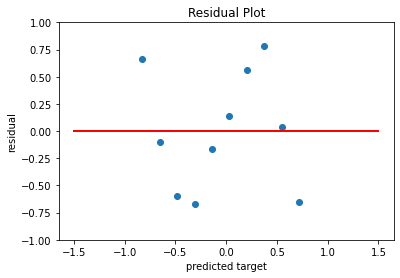

In [20]:
# residual fit
residual = out_attr - train_pred
plt.scatter(train_pred, residual)
plt.plot([-1.5,1.5],[0,0],'r-', linewidth=2)
plt.xlabel('predicted target')
plt.ylabel('residual')
plt.title('Residual Plot')
plt.ylim([-1,1])
plt.show()
#notice how you can see a sin wave. This means the model needs to become more complex (polynomial)

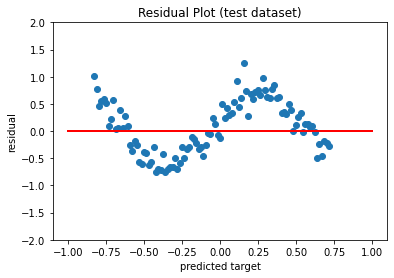

In [24]:
# residual fit
residual = test_out_attr - test_pred
plt.scatter(test_pred, residual)
plt.plot([-1,1],[0,0],'r-', linewidth=2)
plt.xlabel('predicted target')
plt.ylabel('residual')
plt.title('Residual Plot (test dataset)')
plt.ylim([-2,2])
plt.show()

In [21]:
# read testing data
df_test = pd.read_csv("exercise_2_testing.csv")

# print the dataframe
print(df_test.head())

   id         x         y
0   0  0.000000  0.442580
1   1  0.010101  0.489103
2   2  0.020202  0.494935
3   3  0.030303  0.205728
4   4  0.040404  0.422941


In [22]:
# create the input and output attributes
test_inp_attr = df_test['x'].values.reshape(-1, 1) 

# generate the nonlinear features
test_inp_feat = poly.fit_transform(test_inp_attr)
test_out_attr = df_test['y'].values

# predict at the new input
test_pred = ols.predict(test_inp_feat)

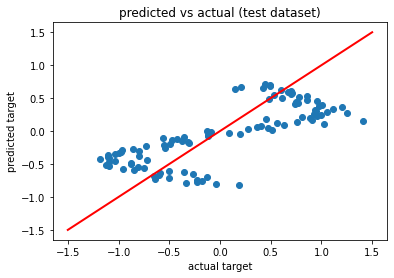

In [23]:
# predicted vs actual plot
plt.scatter(test_out_attr, test_pred)
plt.plot([-1.5,1.5],[-1.5,1.5],'r-', linewidth=2)
plt.xlabel('actual target')
plt.ylabel('predicted target')
plt.title('predicted vs actual (test dataset)')
plt.show()